In [1]:
import numpy as np
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
p=Path("images/")

In [3]:
print(type(p))

<class 'pathlib.WindowsPath'>


In [4]:
#very imp method - glob : this accepts one regular expression 
#expression for what kind of files i want to look in the path
#it basically give generator object
dirs=p.glob("*")
for folder_name in dirs:
    print(folder_name)
    label=str(folder_name).split("\\")[-1][:-1]
    print(label)
#why we using \\ since it is a special char we need a double \\
#now that we have extracted labels les move forward

images\cats
cat
images\dogs
dog
images\horses
horse
images\humans
human


In [5]:
dirs=p.glob("*")
for folder_dir in dirs:
    label=str(folder_dir).split("\\")[-1][:-1]
    for img_path in folder_dir.glob("*.jpg"):
        print(img_path)

images\cats\cat.1.jpg
images\cats\cat.10.jpg
images\cats\cat.100.jpg
images\cats\cat.101.jpg
images\cats\cat.102.jpg
images\cats\cat.103.jpg
images\cats\cat.104.jpg
images\cats\cat.105.jpg
images\cats\cat.106.jpg
images\cats\cat.107.jpg
images\cats\cat.108.jpg
images\cats\cat.109.jpg
images\cats\cat.11.jpg
images\cats\cat.110.jpg
images\cats\cat.111.jpg
images\cats\cat.112.jpg
images\cats\cat.113.jpg
images\cats\cat.114.jpg
images\cats\cat.115.jpg
images\cats\cat.116.jpg
images\cats\cat.117.jpg
images\cats\cat.118.jpg
images\cats\cat.119.jpg
images\cats\cat.12.jpg
images\cats\cat.120.jpg
images\cats\cat.121.jpg
images\cats\cat.122.jpg
images\cats\cat.123.jpg
images\cats\cat.124.jpg
images\cats\cat.125.jpg
images\cats\cat.126.jpg
images\cats\cat.127.jpg
images\cats\cat.128.jpg
images\cats\cat.129.jpg
images\cats\cat.13.jpg
images\cats\cat.130.jpg
images\cats\cat.131.jpg
images\cats\cat.132.jpg
images\cats\cat.133.jpg
images\cats\cat.134.jpg
images\cats\cat.135.jpg
images\cats\cat.136.jp

In [6]:
dirs=p.glob("*")
labels_dict={"cat":0,"dog":1,"horse":2,"human":3}
image_data=[]
labels=[]
for folder_dir in dirs:
    label=str(folder_dir).split("\\")[-1][:-1] 
    
    for img_path in folder_dir.glob("*.jpg"):
        img =image.load_img(img_path,target_size=(32,32))
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])

In [7]:
print(len(image_data))
print(len(labels))

808
808


In [8]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [9]:
#convert this into numpy array
image_data=np.array(image_data,dtype='float32')/255.0
labels=np.array(labels)
print(image_data.shape,labels.shape)

(808, 32, 32, 3) (808,)


In [10]:
#random shuffle our data
import random 

combined=list(zip(image_data,labels))
random.shuffle(combined)

#unzip
image_data[:],labels[:]=zip(*combined)

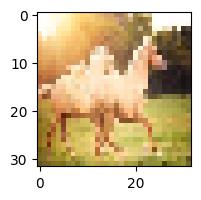

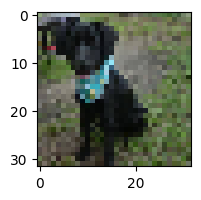

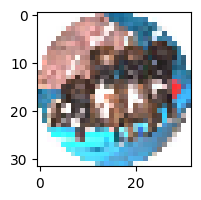

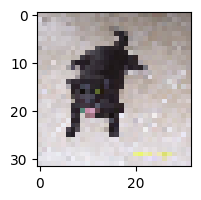

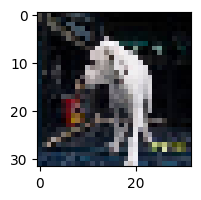

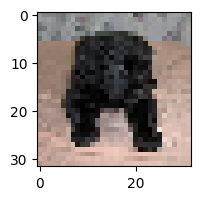

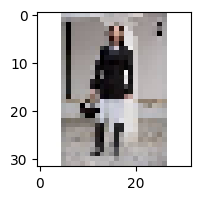

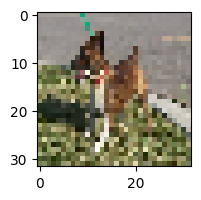

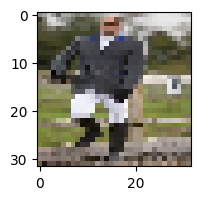

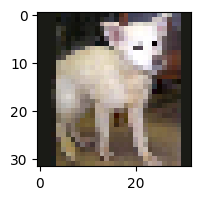

In [11]:
#visualise this data

def draw(img):
    from matplotlib import pyplot as plt
    plt.figure(figsize=(2, 2))
    plt.imshow(img)
    plt.show()
    return
#draw(image_data[0])
for i in range(10):
    draw(image_data[i])

In [12]:
#SVM Classifier 
#Implementing SVM Classifier from scratch
class SVM:
    """SVM Class, Author : Prateek Narang"""
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=50,learning_rate=0.001,maxItr=500):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses

In [13]:
# we need to convert data for one for one classification4
#image_data reshape
M=image_data.shape[0]
image_data=image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)

(808, 3072)
(808,)


In [14]:
CLASSES = len(np.unique(labels))
print(CLASSES)

4


In [15]:
def classWiseData(x,y):
    data = {}
    
    for i in range(CLASSES):
        data[i] = []
        
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    
    for k in data.keys():
        data[k] = np.array(data[k])
        
    return data

In [16]:
data = classWiseData(image_data,labels)

In [17]:
print(data[0].shape[0])
print(data[1].shape[0])
print(data[2].shape[0])
print(data[3].shape[0])

202
202
202
202


In [18]:
def getDataPairForSVM(d1,d2):
    """combines Data of two classes into a single matrix"""
    
    l1,l2 = d1.shape[0],d2.shape[0]
    
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = +1
    
    return data_pair,data_labels

[404.0, 403.18511524183214, 402.3703104812879, 401.5556105316131, 400.7409393959561, 399.92637199228693, 399.11192100758495, 398.2975372957562, 397.4832051849257, 396.66894051742435, 395.8547899342426, 395.040718796423, 394.5660360013329, 393.8482598435745, 393.26251911908633, 392.75455986066754, 392.2284860535529, 391.7511080674347, 391.2265967487369, 390.7040566449154, 390.24865810952315, 389.5990607034647, 389.0599560166171, 388.5177607547792, 388.03449517137705, 387.42773509917026, 386.91043936276293, 386.3684471780807, 385.84467807725974, 385.3493751282273, 384.8362841315851, 384.2418022964783, 383.73840203604243, 383.1866262084912, 382.67807046547915, 382.13650209144254, 381.6014447564702, 381.1024341230727, 380.5472598355021, 380.04701926758673, 379.5007473019457, 378.9691575537008, 378.49248426797527, 377.94719195698406, 377.41505078877975, 376.88449037450255, 376.34880320573984, 375.82603408044986, 375.3629064900253, 374.8406069146234, 374.41876307727614, 373.847362065167, 373

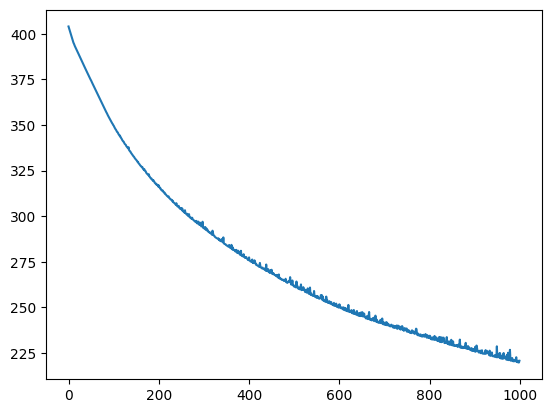

In [19]:
#Now feed data to svm classifier for training nC2 svm
mySVM  = SVM()
xp, yp  = getDataPairForSVM(data[0],data[1])
w,b,loss  = mySVM.fit(xp,yp,learning_rate=0.00001,maxItr=1000)
print(loss)
plt.plot(loss)

In [20]:
def trainSVMs(x,y):
    
    svm_classifiers = {}
    for i in range(CLASSES):
        svm_classifiers[i] = {}
        for j in range(i+1,CLASSES):
            xpair,ypair = getDataPairForSVM(data[i],data[j])
            wts,b,loss = mySVM.fit(xpair,ypair,learning_rate=0.00001,maxItr=1000)
            svm_classifiers[i][j] = (wts,b)
            
            plt.plot(loss)
            plt.show()
            
    
    return svm_classifiers

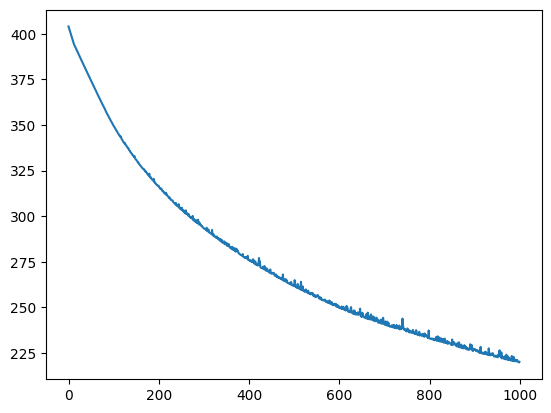

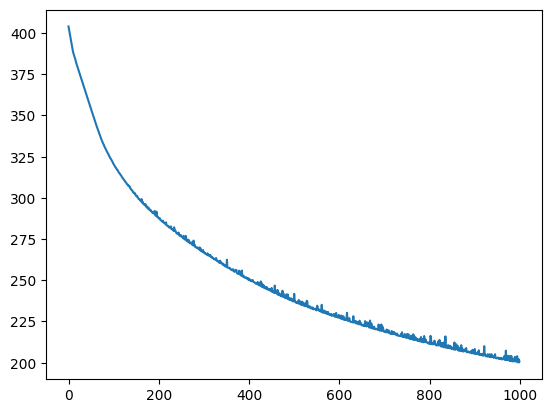

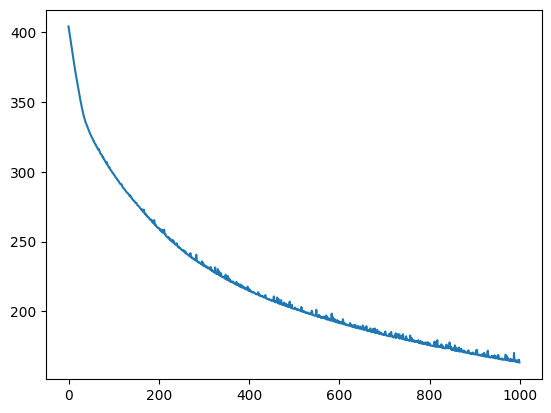

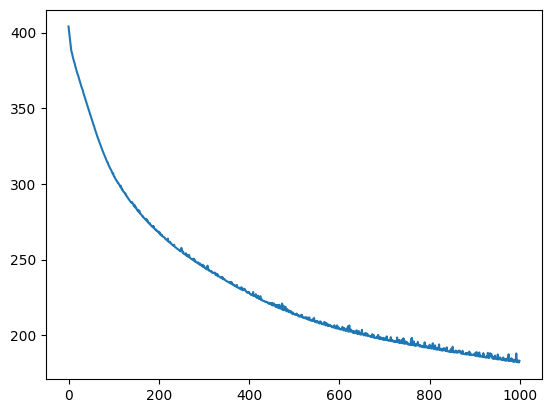

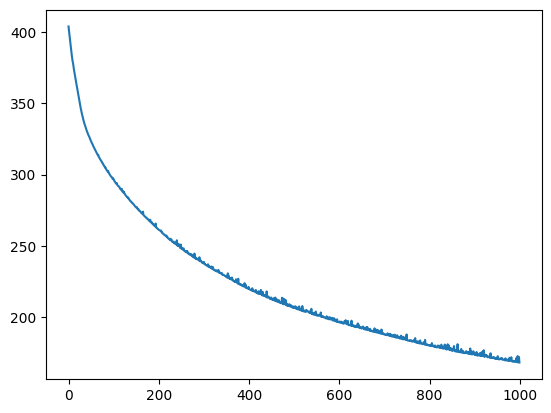

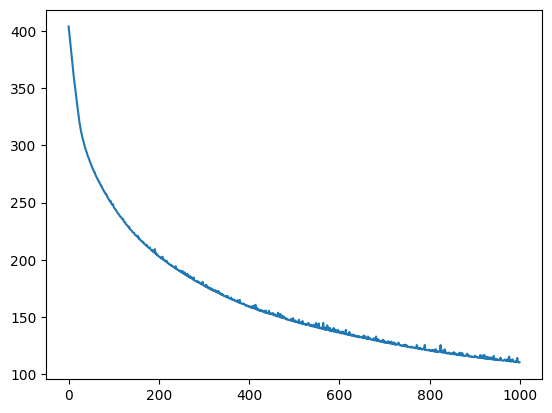

In [21]:
svm_classifiers = trainSVMs(image_data,labels)

In [22]:
#Parameters for Cats and dogs
cats_dogs = svm_classifiers[0][1]
cats_humans = svm_classifiers[0][3]
print(cats_dogs[0].shape)
print(cats_dogs[1])

(1, 3072)
0.028560000000000065


In [23]:
#prediction
def binaryPredict(x,w,b):
    z  = np.dot(x,w.T) + b
    if z>=0:
        return 1
    else:
        return -1

In [24]:
def predict(x):
    
    count = np.zeros((CLASSES,))
    
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            w,b = svm_classifiers[i][j]
            #Take a majority prediction 
            z = binaryPredict(x,w,b)
            
            if(z==1):
                count[j] += 1
            else:
                count[i] += 1
    
    final_prediction = np.argmax(count)
    #print(count)
    return final_prediction

In [25]:
print(predict(image_data[0]))
print(labels[0])

0
2


In [26]:
def accuracy(x,y):
    
    count = 0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction==y[i]):
            count += 1
            
    return count/x.shape[0]

In [27]:
accuracy(image_data,labels)

0.5952970297029703

In [29]:
# SVM using scikit learn
svm_classifier = svm.SVC(kernel='linear',C=1.0)

In [30]:
svm_classifier.fit(image_data,labels)
svm_classifier.score(image_data,labels)

0.6336633663366337